<a href="https://colab.research.google.com/github/JagrutBhatt/NeuralNetworks/blob/main/nn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Numpy  for computation and pandas for Importing Data from CSV file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download Data

In [2]:
#Downloading Data From Google Drive
!gdown 10P2gcOiVJh9R4w7DfrCig2Wp94J5uqkB
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=10P2gcOiVJh9R4w7DfrCig2Wp94J5uqkB
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 63.8MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


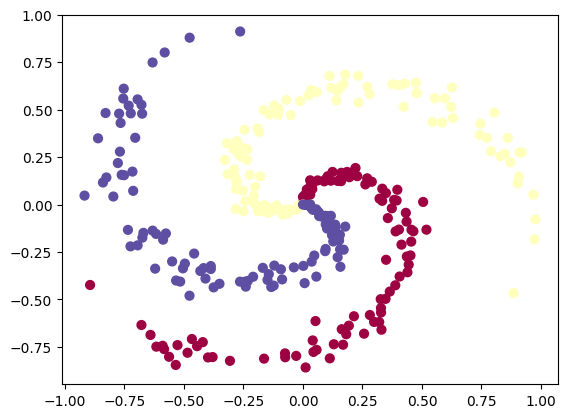

In [3]:
plt.scatter(df["x1"], df["x2"], c=df["y"], s=40, cmap=plt.cm.Spectral)
plt.show()

#### Deviding Data points into Input and Output and convert into Numpy array

In [4]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

### Defining Shapes n, k and c

In [5]:
n = X.shape[0]             # No of Input Data points
k = X.shape[1]             # No of Feachers Per Data point
c = len(np.unique(Y))      # No of classes in Output

print("No of Input Data points       : ",n)
print("No of Feachers per Data point : ",k)
print("No of Classes in Output       : ",c)

No of Input Data points       :  300
No of Feachers per Data point :  2
No of Classes in Output       :  3


### Explanation: Forward Propagation and basic terminology

---

#### Terminology:

*   Here we are using 1 hidden layer with 4 node and each node having Relu activation function
*   So I/P layer , Hidden layer and then Output layer as shown in figure bellow
:

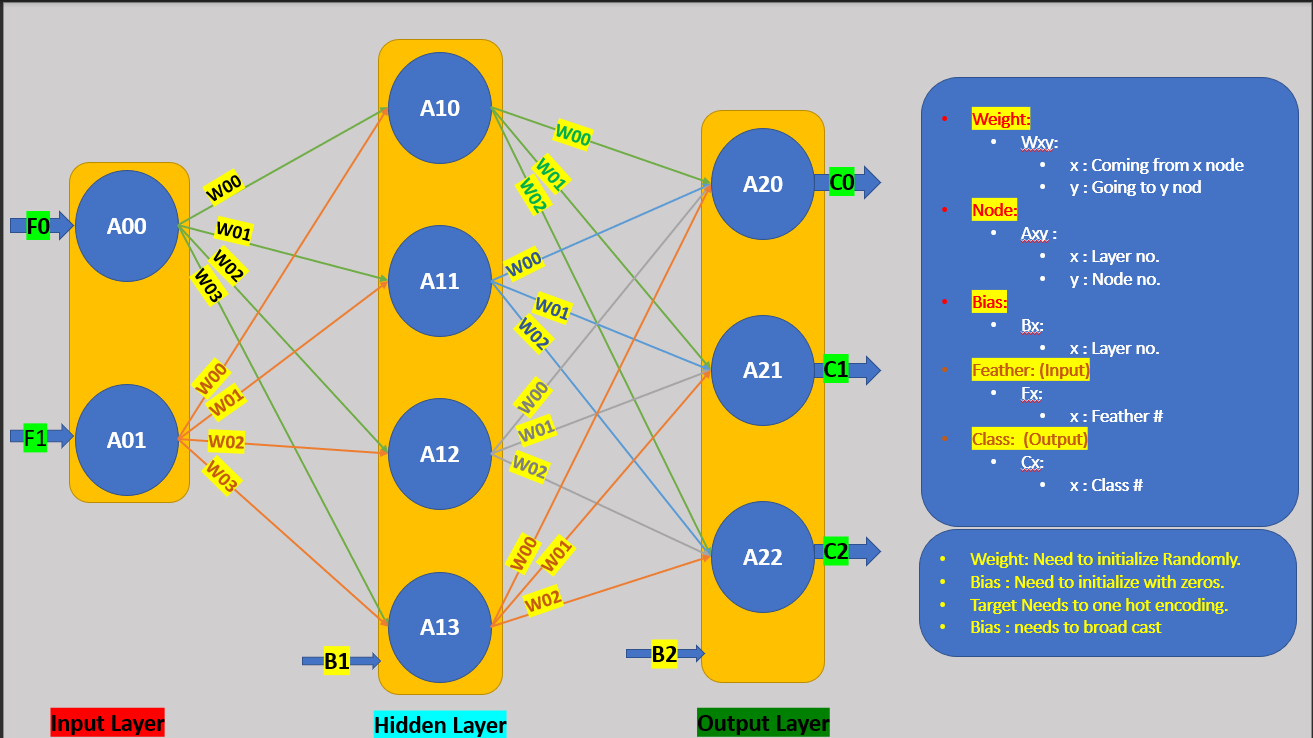
---





#### Example:
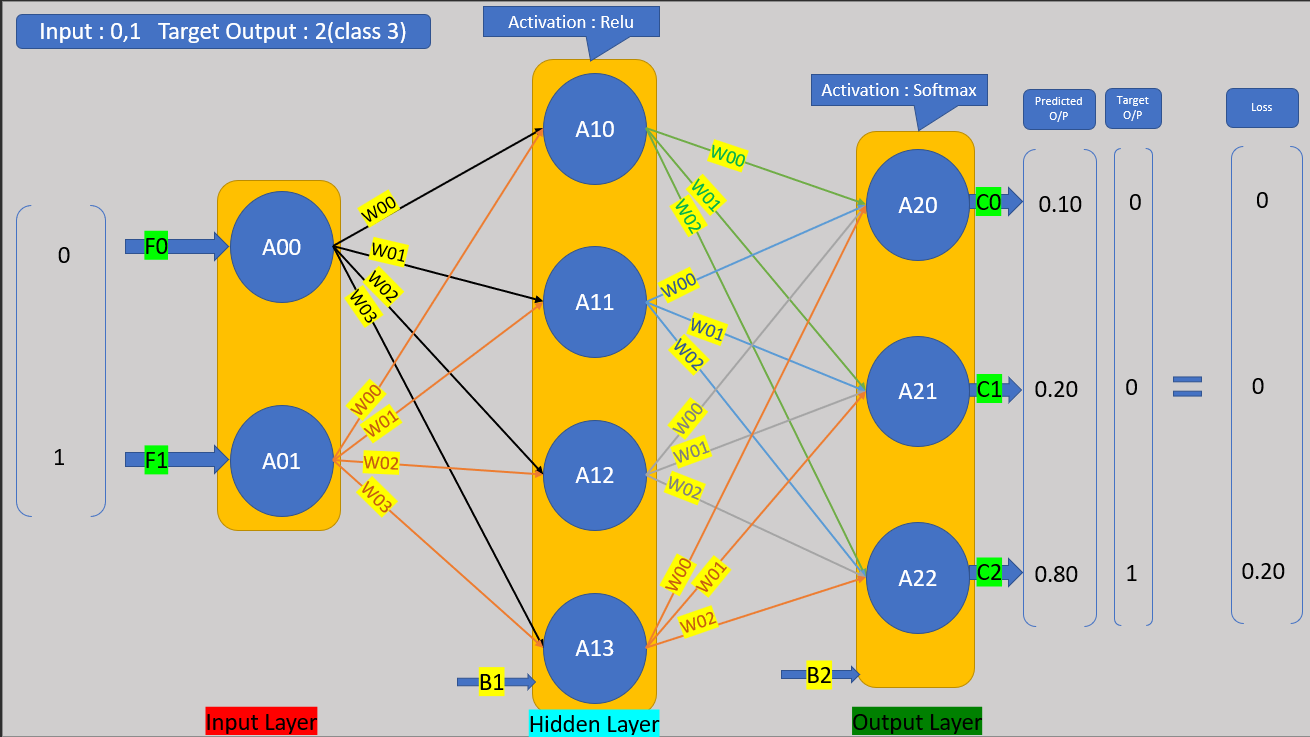

#### Activation Function :
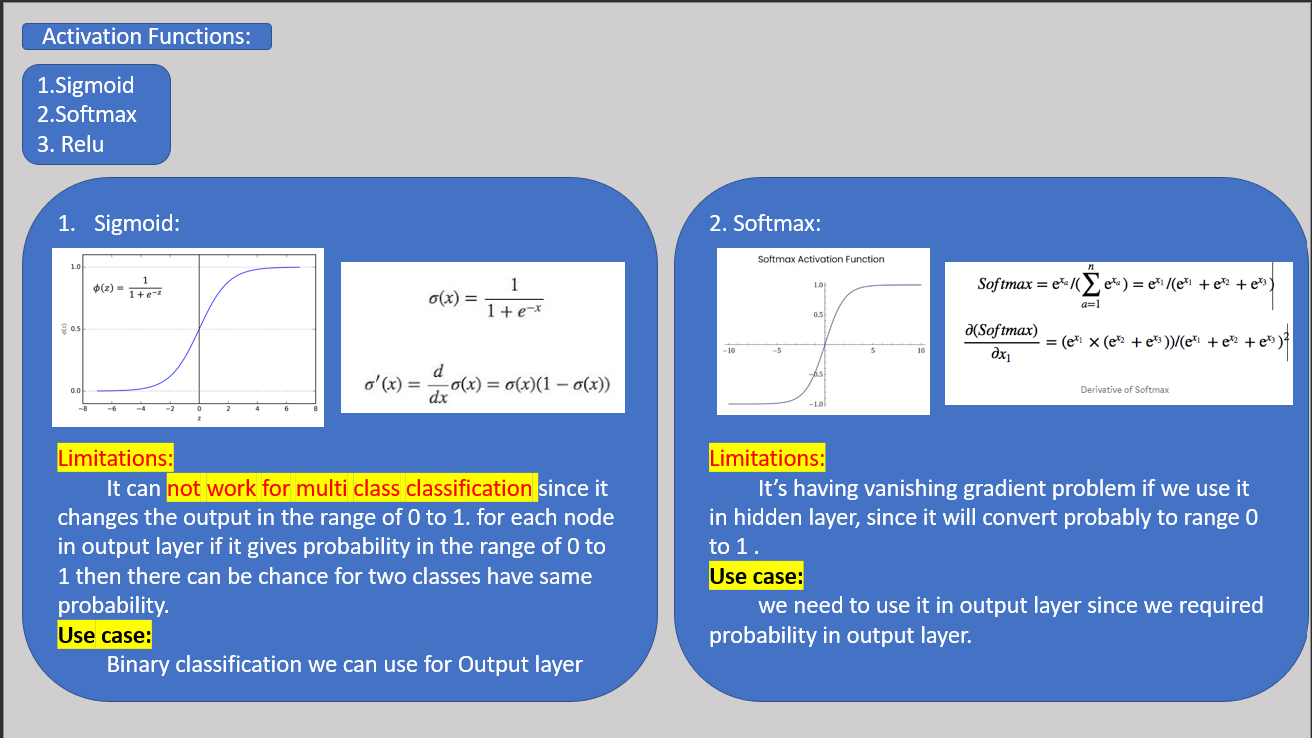




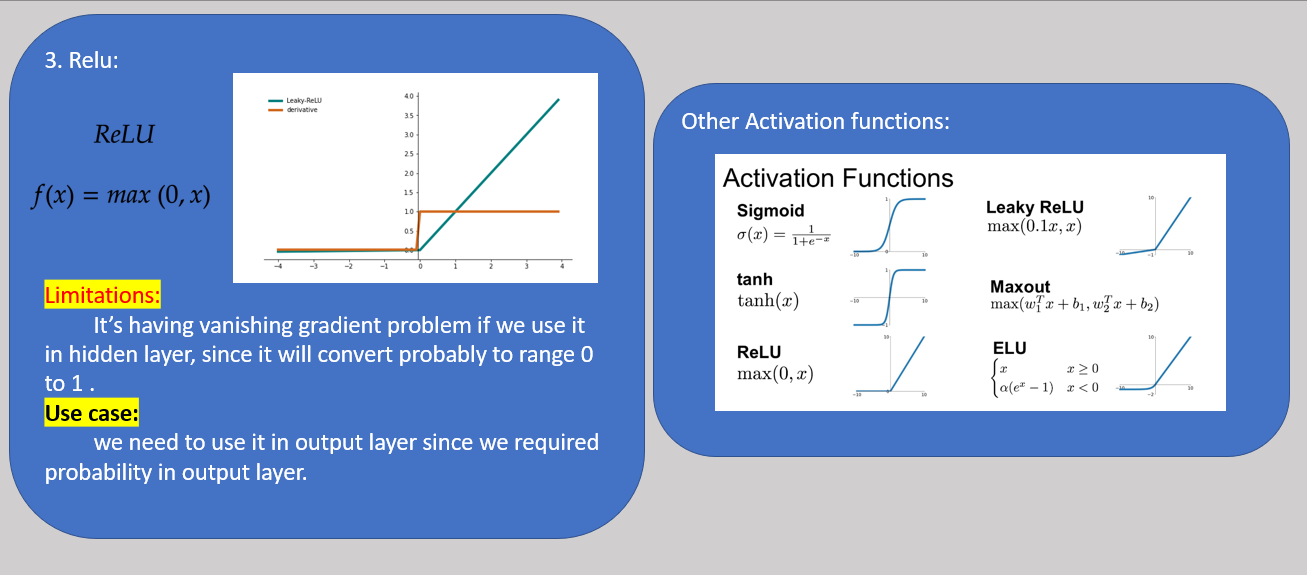

#### Calculation and shapes
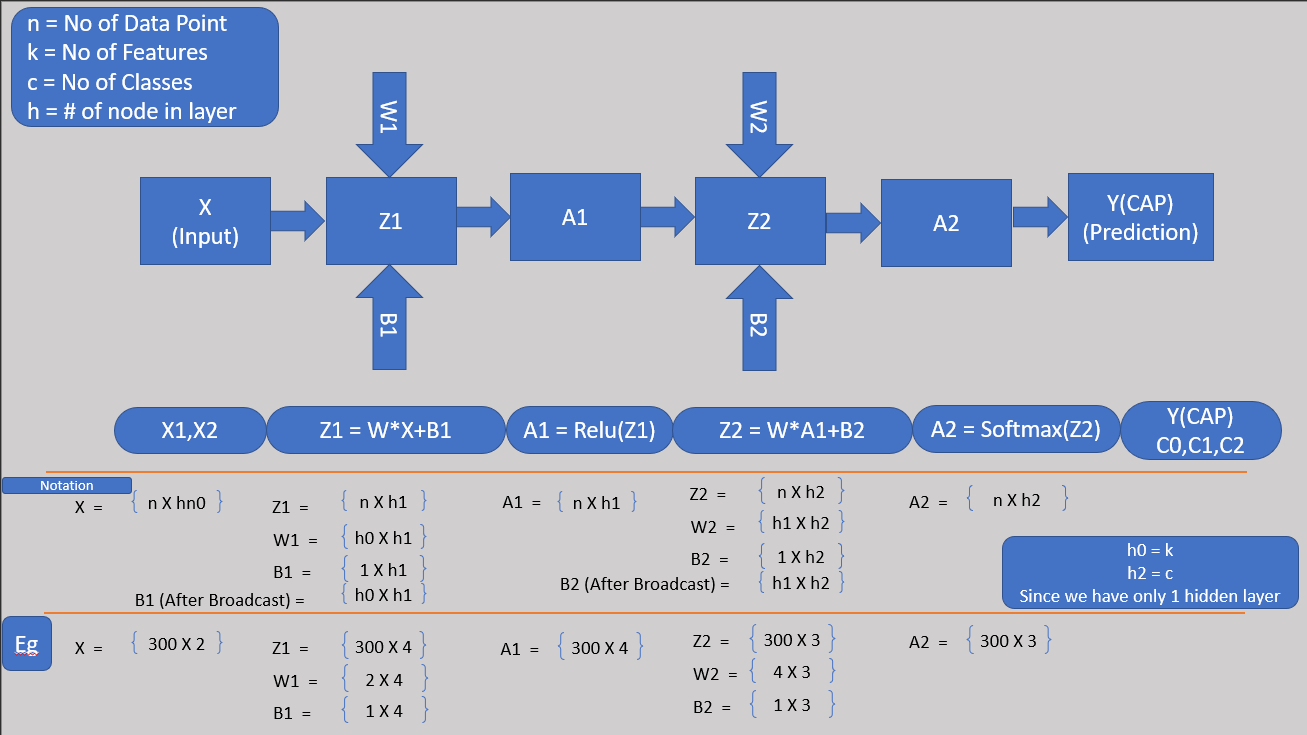

In [6]:
h0 = k
h1 = 100
h2 = c

In [7]:
#Initializing Weights and Biases
def Initialization(h0,h1,h2):
  W1 = 0.01 * np.random.rand(h0,h1)
  B1 = np.zeros((1,h1))
  W2 = 0.01 * np.random.rand(h1,h2)
  B2 = np.zeros((1,h2))
  return W1,W2,B1,B2

In [8]:
W1,W2,B1,B2 = Initialization(h0,h1,h2)

In [9]:
#Softmax Function
def Softmax(Z):
  return np.exp(Z)/np.sum(np.exp(Z),axis = 1,keepdims=True)

### Forward Propagation

In [10]:
def ForwardPass(X,W1,B1,W2,B2):
  Z1 = np.dot(X,W1)+B1
  A1 = np.maximum(Z1,0)
  Z2 = np.dot(A1,W2)+B2
  A2 = Softmax(Z2)
  return Z1,A1,A2

In [11]:
Z1,A1,A2 = ForwardPass(X,W1,B1,W2,B2)
prob = A2
prob

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333288, 0.33333385, 0.33333327],
       [0.33333184, 0.33333539, 0.33333277],
       [0.33333141, 0.33333583, 0.33333277],
       [0.33333134, 0.33333568, 0.33333298],
       [0.3333304 , 0.33333702, 0.33333259],
       [0.33332881, 0.33333957, 0.33333162],
       [0.33332849, 0.33333978, 0.33333173],
       [0.33332841, 0.33333962, 0.33333197],
       [0.33332679, 0.3333422 , 0.333331  ],
       [0.33332663, 0.33334215, 0.33333122],
       [0.3333259 , 0.33334314, 0.33333096],
       [0.33332504, 0.33334437, 0.33333059],
       [0.33332511, 0.33334392, 0.33333096],
       [0.33332312, 0.3333472 , 0.33332967],
       [0.3333216 , 0.33334982, 0.33332858],
       [0.33332085, 0.33335083, 0.33332831],
       [0.33331967, 0.33335291, 0.33332742],
       [0.33331934, 0.33335291, 0.33332774],
       [0.33331787, 0.33335589, 0.33332624],
       [0.33331704, 0.33335728, 0.33332568],
       [0.33331693, 0.33335635, 0.33332672],
       [0.

### Calculating Loss

In [12]:
# Result (One Hot encoding and based on Target took the result)
probs = prob[range(n), Y]
probs

array([0.33333333, 0.33333288, 0.33333184, 0.33333141, 0.33333134,
       0.3333304 , 0.33332881, 0.33332849, 0.33332841, 0.33332679,
       0.33332663, 0.3333259 , 0.33332504, 0.33332511, 0.33332312,
       0.3333216 , 0.33332085, 0.33331967, 0.33331934, 0.33331787,
       0.33331704, 0.33331693, 0.33331549, 0.3333148 , 0.33331379,
       0.33331305, 0.33331217, 0.3333114 , 0.33331136, 0.33330975,
       0.33330931, 0.33330895, 0.33331126, 0.33331113, 0.33330795,
       0.33330812, 0.33331386, 0.3333104 , 0.33330767, 0.33330717,
       0.33330418, 0.33331545, 0.33331394, 0.33330766, 0.33330968,
       0.3333264 , 0.33331837, 0.33331044, 0.33331036, 0.33331465,
       0.33330043, 0.33332005, 0.33331888, 0.33330622, 0.33332174,
       0.3333274 , 0.33332415, 0.33333052, 0.33333315, 0.3333369 ,
       0.33333577, 0.33333329, 0.33333669, 0.33333811, 0.33333827,
       0.33333846, 0.33333598, 0.333335  , 0.33333858, 0.33333901,
       0.33333542, 0.3333333 , 0.33333743, 0.33333915, 0.33333

In [13]:
loss = np.mean(-np.log([prob[range(n),Y]]))
loss

1.098583164379554

###  Explanation: Backword Propagation and basic terminology

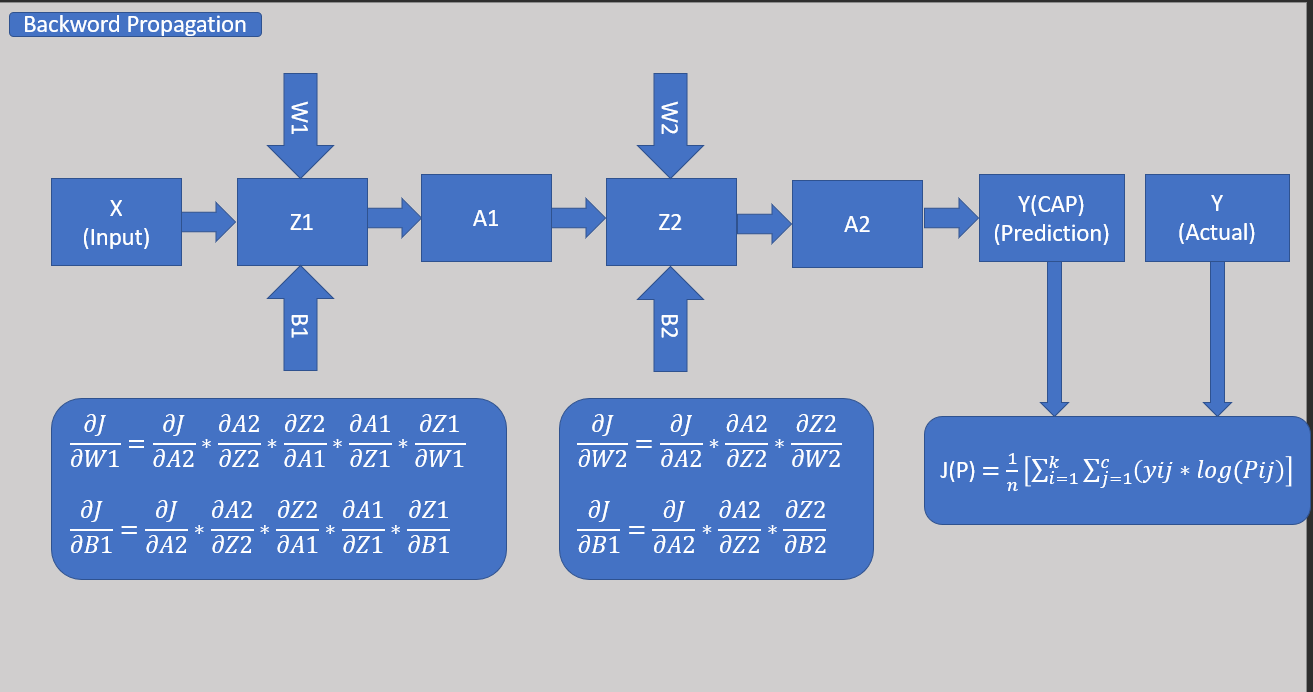

#### Derivation:

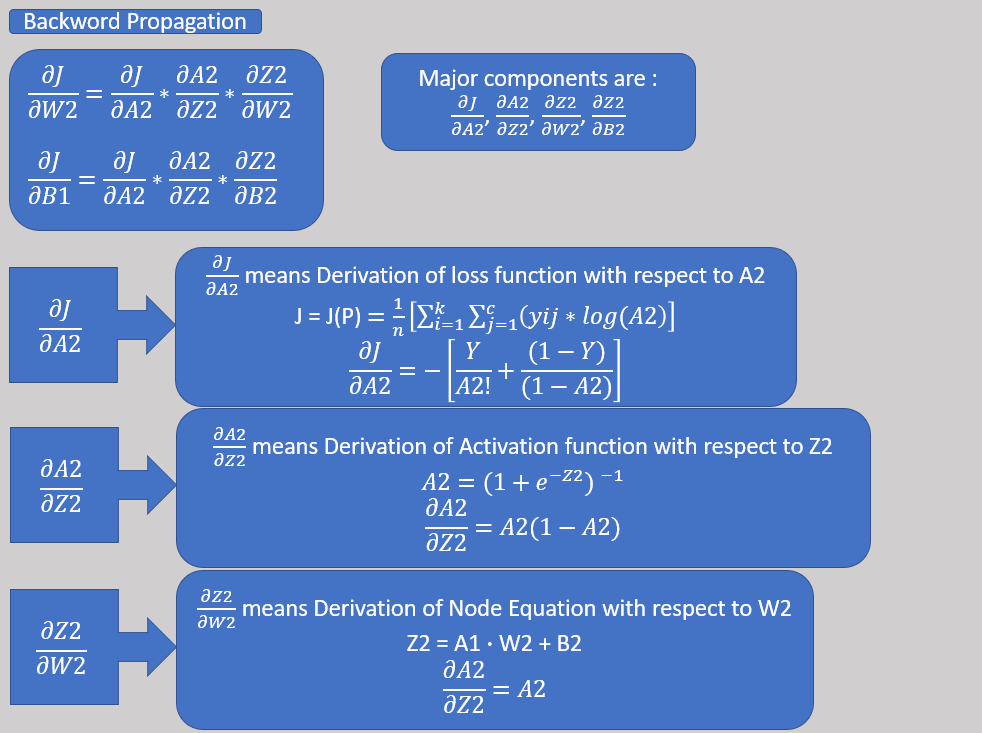

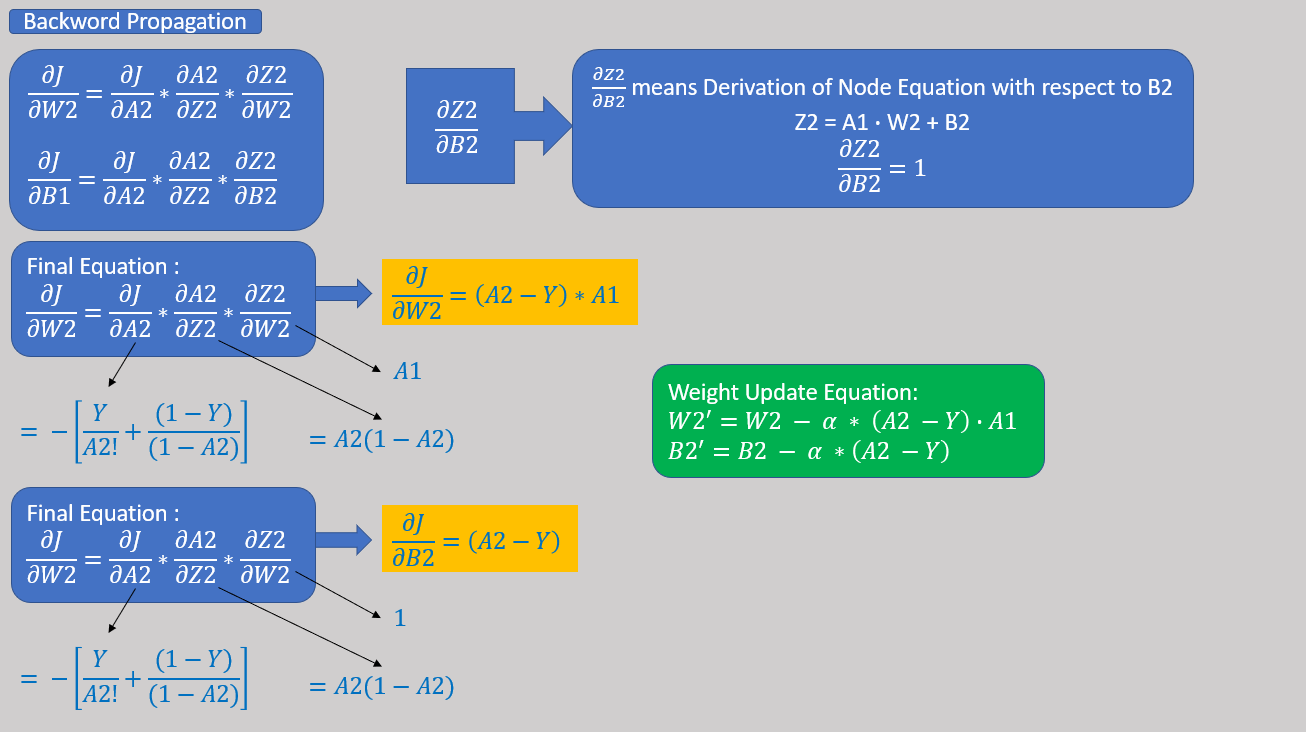

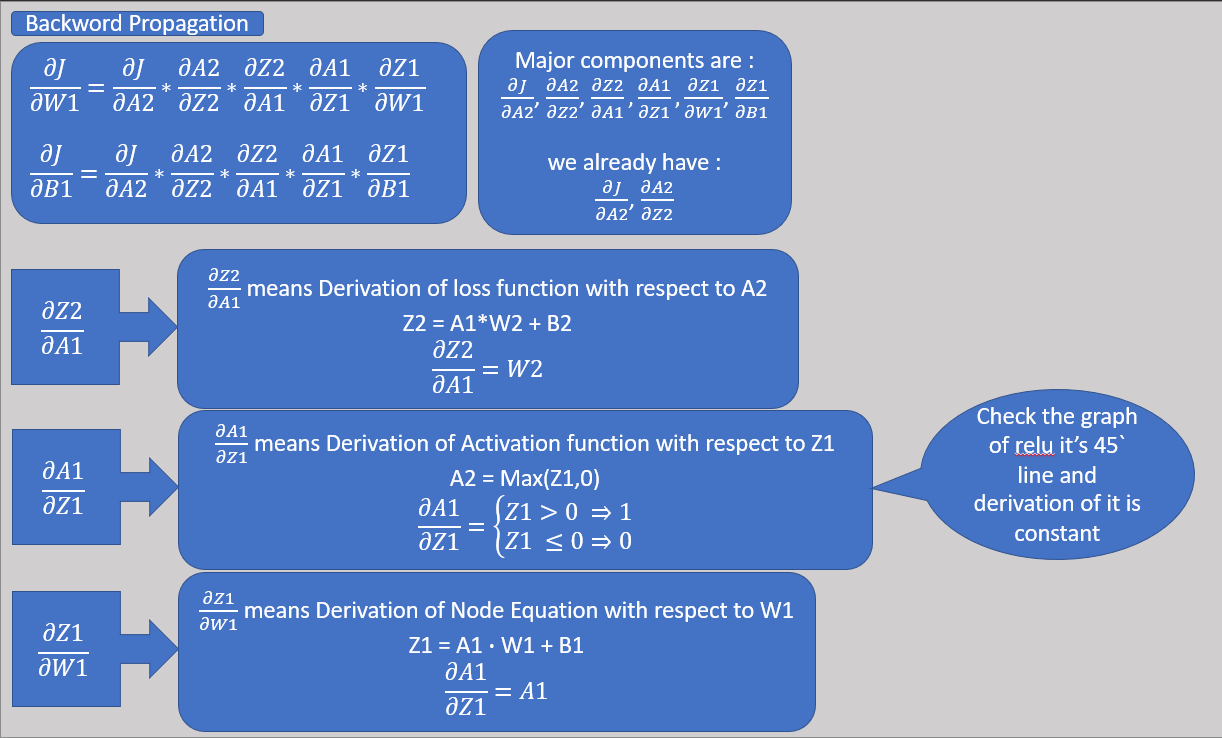

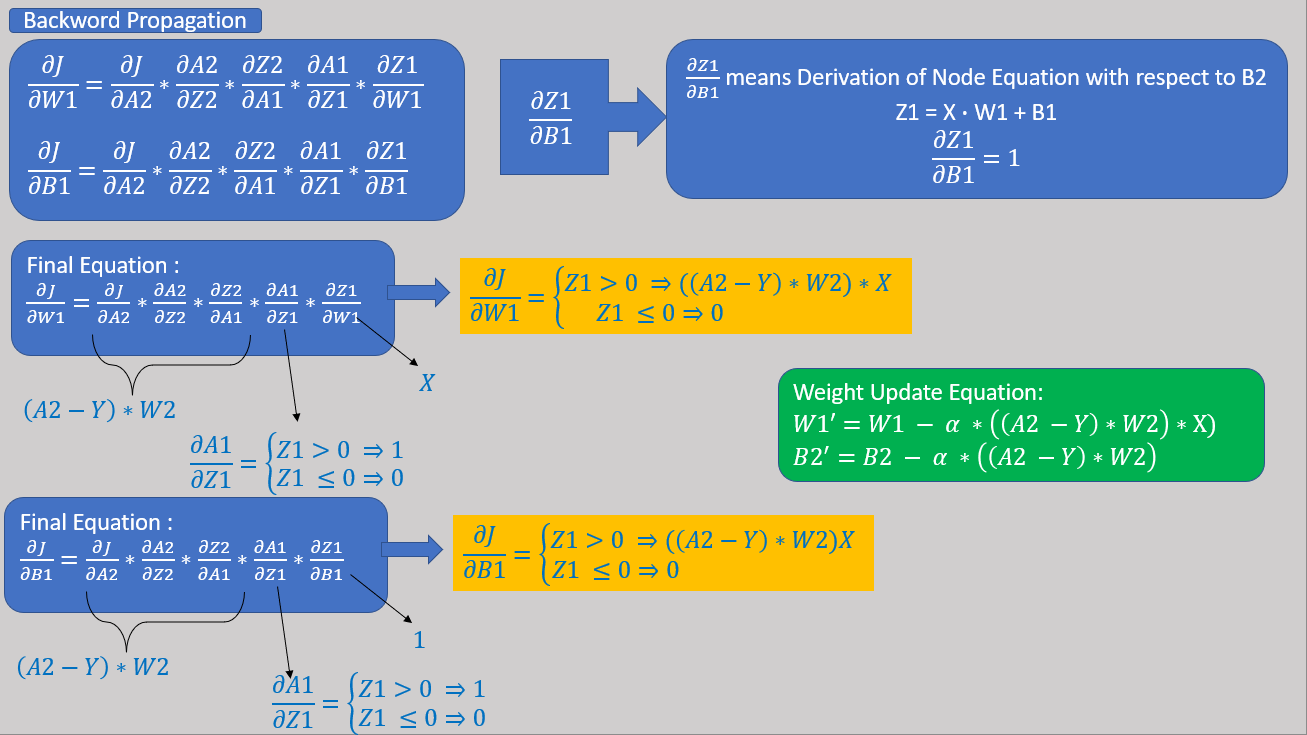

### Back Propagation:


In [14]:
def backprop(prob,W2,Z1):
  dZ2 = prob
  dZ2[range(n),Y] -= 1                            #(Prob - Y) Target class result value will be minus and remaining value remain there.
  dZ2 /= n                                        # Take mean
  dW2_New = np.dot(A1.T,dZ2)                      # np.dot(A1.T,(Prob - Y)) for new value of weights
  dB2_New = np.sum(dZ2, axis=0, keepdims=True)    # (Prob - Y) for new value of Bias

  # next backprop into hidden layer, A1
  dA1 = np.dot(dZ2, W2.T)
  # backprop the ReLU non-linearity
  dA1[Z1 <= 0] = 0
  dZ1 = dA1
  dW1_New = np.dot(X.T, dZ1)
  dB1_New = np.sum(dZ1, axis=0, keepdims=True)

  return dW1_New,dB1_New,dW2_New,dB2_New

In [15]:
dW1_New,dB1_New,dW2_New,dB2_New = backprop(prob,W2,Z1)
dW1_New,dB1_New,dW2_New,dB2_New

(array([[-1.49124041e-04,  2.56343540e-04, -3.31938345e-05,
          1.29892895e-04, -1.73432700e-04,  3.78559030e-04,
         -6.41876984e-05, -1.05002454e-04,  1.15951768e-04,
         -3.32019266e-04,  7.62350651e-05, -9.98126604e-05,
         -1.60094080e-04,  5.11089182e-05, -2.78228846e-05,
          7.68186168e-05,  3.95742842e-04, -1.02381347e-04,
          1.89621051e-06, -3.80185289e-04, -1.15669185e-05,
         -2.15335632e-04, -3.31639467e-04,  4.24109091e-04,
         -2.08819573e-04,  1.31588518e-04, -2.40815215e-04,
          1.91109050e-04,  3.16010770e-04, -1.46329175e-04,
         -4.07068748e-05,  1.47032869e-04, -4.09959454e-05,
         -4.49997407e-06, -2.53246421e-04,  1.04059940e-04,
         -2.53254266e-04,  9.23727758e-05,  1.10028375e-05,
          1.90892930e-05,  2.21721082e-05,  1.58178804e-04,
          3.28084116e-04, -1.63629721e-04, -3.48703265e-04,
          7.42951506e-05,  2.68300213e-05, -3.80917461e-05,
         -5.89463918e-05,  1.98436178e-0

In [16]:
def Weight_Update(lr,dW1_New,dB1_New,dW2_New,dB2_New,W1,B1,W2,B2):
    # perform a parameter update
    W1 += -lr * dW1_New
    B1 += -lr * dB1_New
    W2 += -lr * dW2_New
    B2 += -lr * dB2_New
    return W1,B1,W2,B2

In [17]:
lr = 0.001
Weight_Update(lr,dW1_New,dB1_New,dW2_New,dB2_New,W1,B1,W2,B2)

(array([[9.56657959e-03, 9.92928476e-03, 2.53921936e-03, 5.18815240e-03,
         7.81926133e-03, 2.11967812e-03, 8.28228139e-03, 9.73146586e-03,
         7.90963346e-04, 5.51005915e-03, 9.07199942e-03, 3.41783281e-03,
         4.97471759e-03, 2.57622155e-03, 5.95383551e-03, 1.30439014e-04,
         1.75007730e-03, 8.82316832e-03, 5.56702397e-04, 5.25239644e-03,
         8.01311888e-03, 9.70126734e-03, 3.59675590e-03, 8.95439977e-04,
         4.63669222e-05, 5.23919725e-04, 5.89336159e-03, 9.55026177e-03,
         7.72146652e-04, 8.87116220e-03, 3.16293347e-03, 8.72818696e-03,
         5.93712789e-03, 1.24705600e-03, 5.83698070e-03, 8.80854071e-03,
         3.65808896e-03, 3.94833108e-03, 8.06058429e-03, 8.00449914e-03,
         3.70092904e-03, 3.07810258e-03, 4.05686266e-03, 4.04266480e-03,
         9.02566117e-03, 1.02280284e-03, 8.62538869e-03, 7.97608393e-03,
         3.44269614e-03, 5.51334611e-03, 8.16561414e-03, 8.16261740e-03,
         2.90678559e-03, 5.89497884e-03, 5.33453786

In [18]:
def fit(X,Y,lr,Itteration):
  W1,W2,B1,B2 = Initialization(h0,h1,h2)
  for i in range(Itteration):
    Z1,A1,A2 = ForwardPass(X,W1,B1,W2,B2)
    prob = A2
    loss = np.mean(-np.log([prob[range(n),Y]]))
    if i % 1000 == 0:
      print(f"Loss for itteration {i} is : {loss}")
    dW1_New,dB1_New,dW2_New,dB2_New = backprop(prob,W2,Z1)
    W1,B1,W2,B2 = Weight_Update(lr,dW1_New,dB1_New,dW2_New,dB2_New,W1,B1,W2,B2)

In [19]:
lr = 1e-0
itteration = 10000
fit(X,Y,lr,itteration)

Loss for itteration 0 is : 1.0986132147268333
Loss for itteration 1000 is : 0.7105289907455322
Loss for itteration 2000 is : 0.6790325782891661
Loss for itteration 3000 is : 0.6600751743930846
Loss for itteration 4000 is : 0.6471915969626104
Loss for itteration 5000 is : 0.6374806432134907
Loss for itteration 6000 is : 0.628784963028103
Loss for itteration 7000 is : 0.6196040992498982
Loss for itteration 8000 is : 0.6053248657835868
Loss for itteration 9000 is : 0.5838229658596752
